In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats.contingency import expected_freq, margins


# Discretización

In [3]:
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.',
header = None, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])
sepal = pd.cut(iris['sepal_length'],4)
petal = pd.cut(iris['petal_length'],4)
sepalw = pd.cut(iris['sepal_width'],4)
petalw = pd.cut(iris['petal_width'],4)


In [4]:
print(sepal)


0      (4.296, 5.2]
1      (4.296, 5.2]
2      (4.296, 5.2]
3      (4.296, 5.2]
4      (4.296, 5.2]
           ...     
145      (6.1, 7.0]
146      (6.1, 7.0]
147      (6.1, 7.0]
148      (6.1, 7.0]
149      (5.2, 6.1]
Name: sepal_length, Length: 150, dtype: category
Categories (4, interval[float64, right]): [(4.296, 5.2] < (5.2, 6.1] < (6.1, 7.0] < (7.0, 7.9]]


# Tabla contingencia

In [5]:
# Tabla de contingencia
print("Tabla contingencia\n")
tcon = pd.crosstab(petal,sepal)
print(tcon)


Tabla contingencia

sepal_length    (4.296, 5.2]  (5.2, 6.1]  (6.1, 7.0]  (7.0, 7.9]
petal_length                                                    
(0.994, 2.475]            39          11           0           0
(2.475, 3.95]              5           6           0           0
(3.95, 5.425]              1          32          28           0
(5.425, 6.9]               0           1          15          12


# Independencia

In [6]:
print("\nFrecuencias esperadas\n")
print(expected_freq(tcon))



Frecuencias esperadas

[[15.         16.66666667 14.33333333  4.        ]
 [ 3.3         3.66666667  3.15333333  0.88      ]
 [18.3        20.33333333 17.48666667  4.88      ]
 [ 8.4         9.33333333  8.02666667  2.24      ]]


- La hipótesis nula es "las variables son independientes"
- Un p-valor bajo significa que se rechaza la hipótesis nula (el p-valor es la probabilidad de observar el resultado, si la hipótesis nula fuese cierta)

In [7]:
print("\ntest chi 2\n")
result = chi2_contingency(tcon)
print(result)



test chi 2

Chi2ContingencyResult(statistic=163.72781790455065, pvalue=1.247012382267777e-30, dof=9, expected_freq=array([[15.        , 16.66666667, 14.33333333,  4.        ],
       [ 3.3       ,  3.66666667,  3.15333333,  0.88      ],
       [18.3       , 20.33333333, 17.48666667,  4.88      ],
       [ 8.4       ,  9.33333333,  8.02666667,  2.24      ]]))


- El p-valor es muy bajo, rechazamos que sean independientes

In [8]:
print("\nMarginales\n")
print(margins(tcon))
print("\nMarginales esperadas\n")
print(margins(expected_freq(tcon)))



Marginales

[array([[50],
       [11],
       [61],
       [28]]), array([[45, 50, 43, 12]])]

Marginales esperadas

[array([[50.],
       [11.],
       [61.],
       [28.]]), array([[45., 50., 43., 12.]])]


# Normalización

In [9]:
# Ejemplo preprocesado 1
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
print("Estandarizado (version 1)\n")
print(X_scaled)


Estandarizado (version 1)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [10]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))


[0. 0. 0.]
[1. 1. 1.]


In [11]:
# Ejemplo preprocesado 2
scaler = preprocessing.StandardScaler().fit(X)
print("Estandarizado\n")
print(scaler.mean_)
print(scaler.scale_)
print(scaler.transform(X))


Estandarizado

[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [12]:
print(scaler.transform(X).mean(axis=0))
print(scaler.transform(X).std(axis=0))


[0. 0. 0.]
[1. 1. 1.]


In [13]:
# Ejemplo preprocesado 3
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])
print("Escalado min/max\n")
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)


Escalado min/max

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [14]:
# Ejemplo preprocesado 4
X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
print("Escalado max abs\n")
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
print(X_train_maxabs)


Escalado max abs

[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]


In [15]:
print("Escalado de un conjunto de test con max abs")
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
print(X_test_maxabs)


Escalado de un conjunto de test con max abs
[[-1.5 -1.   2. ]]


# Transformaciones del histograma

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform,norm
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline


In [17]:
X = uniform.rvs(loc=0,scale=1,size=1000).reshape(-1,1)

def bc(x,l=0):
	return np.vectorize(lambda t:(t**l-1)/l if l!=0 else np.log(t))(x)

def rango(x):
	return np.argsort(x,axis=0)

def rng(x):
	m = x.shape[0]
	return np.vectorize(lambda x : norm.ppf((x-3.0/8.0)/(m+0.25)))(rango(x))


In [18]:
# Transformación Box-Cox
transformerBC = FunctionTransformer(bc)
# Transformación de rango
transformerRN = FunctionTransformer(rng)
XBC = transformerBC.transform(X)
XRN = transformerRN.transform(X)


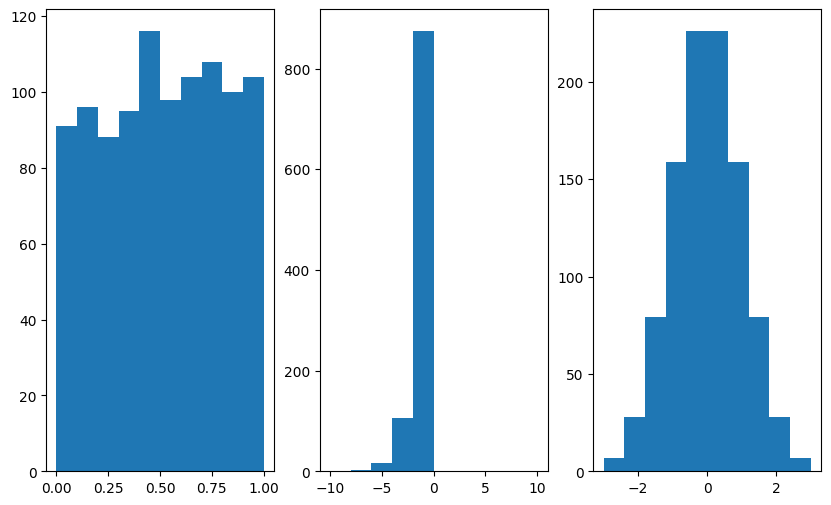

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(131); plt.hist(X,range=(0,1))
plt.subplot(132); plt.hist(XBC,range=(-10,10))
plt.subplot(133); plt.hist(XRN,range=(-3,3))
plt.show()


# Transformaciones polinómicas

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
X = np.arange(6).reshape(3, 2)
print(X)


[[0 1]
 [2 3]
 [4 5]]


In [21]:
# Todos los terminos
poly = PolynomialFeatures(2)
print(poly.fit_transform(X))
# Solo productos
poly = PolynomialFeatures(3,interaction_only=True)
print(poly.fit_transform(X))


[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


In [22]:
# A la medida
transformer = FunctionTransformer(np.log1p)
print(transformer.transform(X))


[[0.         0.69314718]
 [1.09861229 1.38629436]
 [1.60943791 1.79175947]]


# Imputación

In [29]:
"""
======================================================
Imputacion de valores perdidos en el preprocesamiento
======================================================

Comparacion de diferentes metodos de imputacion

"""
import numpy as np

# from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

rng = np.random.RandomState(0)

lineal = False
if lineal:
    X_full, y_full = make_regression(n_samples=100, n_features=10, n_informative=5, n_targets=1, bias=0.0,
    effective_rank=3, tail_strength=0.5, noise=2.5, shuffle=True, coef=False, random_state=None)
else:
    # dataset = load_boston()
    # X_full, y_full = dataset.data, dataset.target
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    X_full, y_full = data, target

clf = linear_model.LinearRegression()
clf.fit(X_full,y_full)
print (clf.coef_)
clf.predict(X_full)

# Error train del modelo lineal (para depuracion)
print("MSE modelo lineal: %.2f" % np.mean((clf.predict(X_full) - y_full) ** 2))
print('R2: %.2f' % clf.score(X_full, y_full))

n_samples = X_full.shape[0]
n_features = X_full.shape[1]


[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
MSE modelo lineal: 21.89
R2: 0.74


In [30]:
# Estimacion del R2 con validacion cruzada para Random Forest
# para el dataset completo
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full,cv=5).mean()
print("R2 del dataset completo = %.2f" % score)

# Se introducen valores perdidos en el 75% de los ejemplos
missing_rate = 0.75
n_missing_samples = int(np.floor(n_samples * missing_rate))
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                      dtype=bool),
                             np.ones(n_missing_samples,
                                     dtype=bool)))
rng.shuffle(missing_samples)
missing_features = rng.randint(0, n_features, n_missing_samples)


R2 del dataset completo = 0.62


In [31]:
# Estimacion del error eliminando todas las instancias que tengan valores perdidos
X_filtered = X_full[~missing_samples, :]
y_filtered = y_full[~missing_samples]
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_filtered, y_filtered,cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos = %.2f" % score)

# Se asigna cero a todas las variables con valor perdido
X_missing = X_full.copy()
X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y_full.copy()

# Estimacion del error con ceros en los valores perdidos
score = cross_val_score(estimator, X_missing, y_missing,cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion a 0= %.2f" % score)


R2 del dataset con 75% de valores perdidos = 0.41
R2 del dataset con 75% de valores perdidos, imputacion a 0= 0.43


In [32]:
# Se reemplazan los ceros por la media de la columna
estimator = Pipeline([("imputer", SimpleImputer(missing_values=0,
                                          strategy="mean")),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing,cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion con la media = %.2f" % score)


R2 del dataset con 75% de valores perdidos, imputacion con la media = 0.60


In [33]:
# Se reemplazan los ceros por la mediana de la columna
estimator = Pipeline([("imputer", SimpleImputer(missing_values=0,
                                          strategy="median")),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing,cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion con la mediana = %.2f" % score)


R2 del dataset con 75% de valores perdidos, imputacion con la mediana = 0.60


# Imputación avanzada

In [28]:
# (parte duplicada del ejemplo anterior)
import numpy as np

# from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

rng = np.random.RandomState(0)

lineal = False
if lineal:
    X_full, y_full = make_regression(n_samples=100, n_features=10, n_informative=5, n_targets=1, bias=0.0,
    effective_rank=3, tail_strength=0.5, noise=2.5, shuffle=True, coef=False, random_state=None)
else:
    # dataset = load_boston()
    # X_full, y_full = dataset.data, dataset.target
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    X_full, y_full = data, target

clf = linear_model.LinearRegression()
clf.fit(X_full,y_full)
print (clf.coef_)
clf.predict(X_full)

# Error train del modelo lineal (para depuracion)
print("MSE modelo lineal: %.2f" % np.mean((clf.predict(X_full) - y_full) ** 2))
print('R2: %.2f' % clf.score(X_full, y_full))

n_samples = X_full.shape[0]
n_features = X_full.shape[1]


[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
MSE modelo lineal: 21.89
R2: 0.74


In [34]:

# Estimacion del R2 con validacion cruzada para Random Forest
# para el dataset completo
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full, cv=5).mean()
print("R2 del dataset completo = %.2f" % score)


R2 del dataset completo = 0.62


In [35]:

# Se introducen valores perdidos en el 75% de los ejemplos
missing_rate = 0.75
n_missing_samples = int(np.floor(n_samples * missing_rate))
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                      dtype=bool),
                             np.ones(n_missing_samples,
                                     dtype=bool)))
rng.shuffle(missing_samples)
missing_features = rng.randint(0, n_features, n_missing_samples)

# Estimacion del error eliminando todas las instancias que tengan valores perdidos
X_filtered = X_full[~missing_samples, :]
y_filtered = y_full[~missing_samples]
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_filtered, y_filtered, cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos = %.2f" % score)


R2 del dataset con 75% de valores perdidos = 0.56


In [56]:

# Se asigna cero a todas las variables con valor perdido
X_missing = X_full.copy()
X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y_full.copy()

# Estimacion del error con ceros en los valores perdidos
score = cross_val_score(estimator, X_missing, y_missing, cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion a 0= %.2f" % score)

# Se reemplazan los ceros por la media de la columna
estimator = Pipeline([("imputer", SimpleImputer(missing_values=0,
                                          strategy="mean")),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing, cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion con la media = %.2f" % score)


R2 del dataset con 75% de valores perdidos, imputacion a 0= 0.43
R2 del dataset con 75% de valores perdidos, imputacion con la media = 0.60


In [57]:

# Se reemplazan los ceros por la mediana de la columna
estimator = Pipeline([("imputer", SimpleImputer(missing_values=0,
                                          strategy="median")),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing, cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion con la mediana = %.2f" % score)


R2 del dataset con 75% de valores perdidos, imputacion con la mediana = 0.60


In [62]:
# ! pip install fancyimpute


In [72]:
from fancyimpute import KNN, IterativeSVD, SoftImpute
# Imputacion con otros metodos de ML
X_incompleta = X_full.copy()
X_incompleta[np.where(missing_samples)[0], missing_features] = None
y_incompleta = y_full.copy()


In [76]:
# Imputacion KNN
X_filled_knn = KNN(k=3).fit_transform(X_incompleta)
score = cross_val_score(estimator, X_filled_knn, y_incompleta, cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion KNN= %.2f" % score)


Imputing row 1/506 with 1 missing, elapsed time: 0.035
Imputing row 101/506 with 1 missing, elapsed time: 0.036
Imputing row 201/506 with 0 missing, elapsed time: 0.037
Imputing row 301/506 with 1 missing, elapsed time: 0.037
Imputing row 401/506 with 1 missing, elapsed time: 0.038
Imputing row 501/506 with 1 missing, elapsed time: 0.038
R2 del dataset con 75% de valores perdidos, imputacion KNN= 0.61


In [75]:
# Imputacion IterativeSVD
X_filled_svd = IterativeSVD().fit_transform(X_incompleta)
score = cross_val_score(estimator, X_filled_svd, y_incompleta, cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion IterativeSVD= %.2f" % score)


[IterativeSVD] Iter 1: observed MAE=20.288648
[IterativeSVD] Iter 2: observed MAE=4.667829
[IterativeSVD] Iter 3: observed MAE=1.517313
[IterativeSVD] Iter 4: observed MAE=0.492689
[IterativeSVD] Iter 5: observed MAE=0.084965
R2 del dataset con 75% de valores perdidos, imputacion IterativeSVD= 0.64


In [74]:
# Imputacion SoftImpute
X_filled_si = SoftImpute().fit_transform(X_incompleta)
score = cross_val_score(estimator, X_filled_si, y_incompleta, cv=5).mean()
print("R2 del dataset con 75%% de valores perdidos, imputacion Soft Impute= %.2f" % score)


[SoftImpute] Max Singular Value of X_init = 12149.111840
[SoftImpute] Iter 1: observed MAE=4.203284 rank=4
[SoftImpute] Iter 2: observed MAE=4.196349 rank=4
[SoftImpute] Iter 3: observed MAE=4.209939 rank=4
[SoftImpute] Iter 4: observed MAE=4.213984 rank=4
[SoftImpute] Iter 5: observed MAE=4.211957 rank=4
[SoftImpute] Iter 6: observed MAE=4.207001 rank=4
[SoftImpute] Iter 7: observed MAE=4.201231 rank=4
[SoftImpute] Iter 8: observed MAE=4.195454 rank=4
[SoftImpute] Iter 9: observed MAE=4.189908 rank=4
[SoftImpute] Iter 10: observed MAE=4.184736 rank=4
[SoftImpute] Iter 11: observed MAE=4.179845 rank=4
[SoftImpute] Iter 12: observed MAE=4.175124 rank=4
[SoftImpute] Iter 13: observed MAE=4.170522 rank=4
[SoftImpute] Iter 14: observed MAE=4.166128 rank=4
[SoftImpute] Iter 15: observed MAE=4.161932 rank=4
[SoftImpute] Iter 16: observed MAE=4.157904 rank=4
[SoftImpute] Iter 17: observed MAE=4.153975 rank=4
[SoftImpute] Iter 18: observed MAE=4.150339 rank=4
[SoftImpute] Iter 19: observed MAE

# Selección de Instancias

In [81]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def NN(X,S,y,x):
	N = len(S)
	d = np.zeros(N)
	for i in range(N):
		d[i] = np.linalg.norm(X[S[i]]-x)
	return S[np.argmin(d)]


def CNN_muy_lento(X,y):
	# Seleccion de instancias
	ipos = np.where(y>0)[0]
	ineg = np.where(y<0)[0]
	ppos = random.choice(ipos)
	pneg = random.choice(ineg)
	S = [ppos,pneg]
	# Se clasifican todas las instancias con S
	seguir = True
	N = len(X)
	iteracion = 0
	while seguir:
		seguir = False
		iteracion += 1
		for i in range(N):
			vecino = NN(X.values,S,y,X.iloc[i])
			if y[vecino]!=y[i]:
				seguir = True
				S = np.concatenate((S,[i]))
		print(iteracion,len(S))
	return S

def dibuja(X,y,Xreducida,yreducida,cl):
	positivos = np.where(y == cl[1])[0]
	negativos = np.where(y == cl[0])[0]
	ax1=plt.subplot(121)
	ax1.set_xlim([min(X.values[:,0]),max(X.values[:,0])])
	ax1.set_ylim([min(X.values[:,1]),max(X.values[:,1])])
	ax1.scatter(X.iloc[positivos].V1,X.iloc[positivos].V2,color='blue')
	ax1.scatter(X.iloc[negativos].V1,X.iloc[negativos].V2,color='red')
	ax2=plt.subplot(122)
	posreducida = np.where(yreducida==cl[1])[0]
	negreducida = np.where(yreducida==cl[0])[0]
	ax2.set_xlim([min(X.values[:,0]),max(X.values[:,0])])
	ax2.set_ylim([min(X.values[:,1]),max(X.values[:,1])])
	ax2.scatter(Xreducida.iloc[posreducida,0],Xreducida.iloc[posreducida,1],color='blue')
	ax2.scatter(Xreducida.iloc[negreducida,0],Xreducida.iloc[negreducida,1],color='red')
	plt.show()


In [82]:
banana_filename = 'banana_data.csv'
banana = pd.read_csv(banana_filename, sep=',', decimal='.', header=None,names= ['clase', 'V1', 'V2'])


1 843
2 1155
3 1177
4 1177


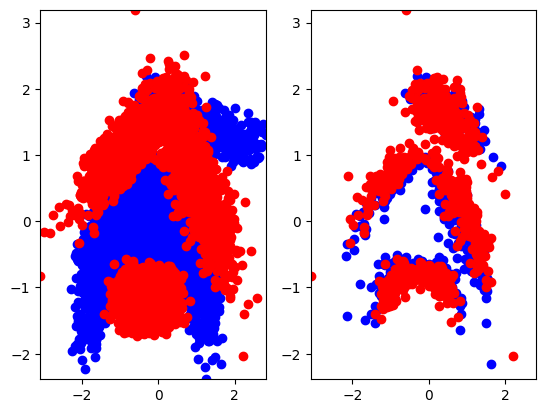

In [83]:
S = CNN_muy_lento(X,y)
Xreducida = X.loc[S]
yreducida = y.loc[S]
dibuja(X,y,Xreducida,yreducida,[-1,1])


In [88]:
# pip install imblearn


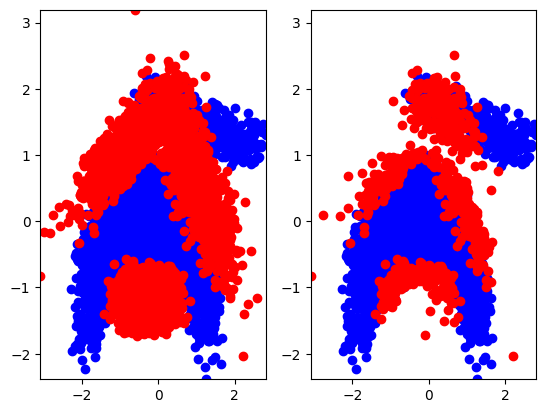

In [89]:
banana2 = banana.copy()
X2 = banana2.iloc[:,1:3]
y2 = banana2.iloc[:,0]
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(sampling_strategy="not minority")
Xreducida2, yreducida2 = cnn.fit_resample(X2, y2)
dibuja(X2,y2,Xreducida2,yreducida2,[-1,1])


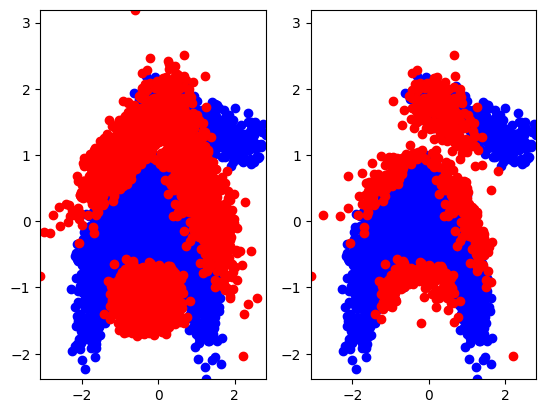

In [90]:
cnn = CondensedNearestNeighbour()
Xreducida2, yreducida2 = cnn.fit_resample(X2, y2)
dibuja(X2,y2,Xreducida2,yreducida2,[-1,1])


# Selección de características

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pandas as pd


In [92]:
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.',
	header=None,names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])


In [93]:
sel = SelectKBest(chi2,k=2)
iris_reducido1 = sel.fit_transform(iris.iloc[:,0:4],iris.iloc[:,4])

print(sel.get_support())


[False False  True  True]


### RFECV

In [111]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd

iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.',
	header=None,names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])

estimator = SVC(kernel="linear")
sel = RFECV(estimator, step=1, cv=5)
iris_reducido2 = sel.fit(iris.iloc[:,0:4],iris.iloc[:,4])
print(sel.ranking_)
print(sel.support_)
print("Numero de caracteristicas seleccionadas : %d" % sel.n_features_)


[1 1 1 1]
[ True  True  True  True]
Numero de caracteristicas seleccionadas : 4


In [112]:
grid_scores = sel.cv_results_["mean_test_score"]
print(grid_scores)


[0.94666667 0.96       0.96666667 0.98      ]


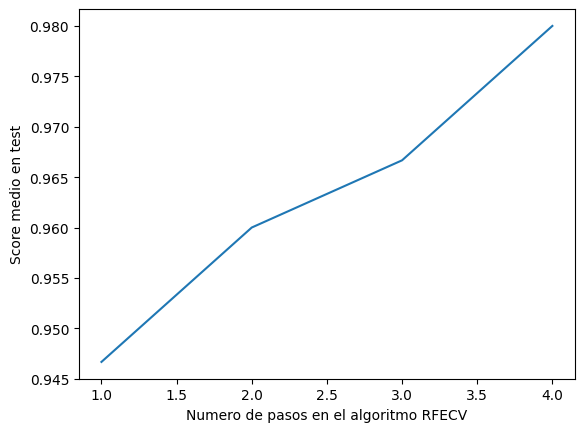

In [113]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de pasos en el algoritmo RFECV")
plt.ylabel("Score medio en test")
plt.plot(range(1, len(grid_scores) + 1), grid_scores)
plt.show()


In [128]:
sonar_filename = 'sonar_csv.csv'
sonar = pd.read_csv(sonar_filename, sep=',', decimal='.')

estimator = SVC(kernel="linear")
sel = RFECV(estimator, step=1, cv=5)
sonar_reducido2 = sel.fit(sonar.iloc[:,:-1],sonar.iloc[:,-1])
print(sel.ranking_)
print(sel.support_)
print("Numero de caracteristicas seleccionadas : %d" % sel.n_features_)
print("Variables elegidas:",np.where(sel.support_))


[41 38 25  6  9 32 26 40 17  3  1  1 20 33 19  8 37 56 36 43  7 27 21 31
 35 28 55 22 13 29 12 51 44 34 53  2 15 16 23 24 46 30  4 11  1 10 14  5
 18 49 39 42 50 47 58 52 57 48 45 54]
[False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False]
Numero de caracteristicas seleccionadas : 3
Variables elegidas: (array([10, 11, 44]),)


In [108]:
# print(sel.cv_results_)


[0.60116144 0.60046458 0.66852497 0.62996516 0.66817654 0.64912892
 0.62508711 0.62508711 0.6203252  0.62984901 0.64924506 0.62984901
 0.60603949 0.58675958 0.61080139 0.62555168 0.62090592 0.62555168
 0.62555168 0.62078978 0.62555168 0.6253194  0.61126597 0.59651568
 0.60638792 0.60150987 0.61114983 0.62078978 0.62055749 0.62055749
 0.62055749 0.61579559 0.62055749 0.63495935 0.63495935 0.63495935
 0.62520325 0.6300813  0.6300813  0.6300813  0.6300813  0.6300813
 0.6300813  0.6300813  0.6253194  0.6300813  0.6253194  0.6300813
 0.6300813  0.6300813  0.6253194  0.6253194  0.6253194  0.6253194
 0.6253194  0.6253194  0.6253194  0.6253194  0.6253194  0.6253194 ]


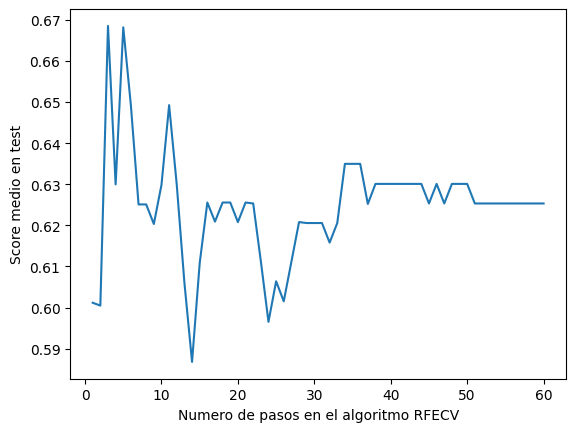

In [117]:
grid_scores = sel.cv_results_["mean_test_score"]
print(grid_scores)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de pasos en el algoritmo RFECV")
plt.ylabel("Score medio en test")
plt.plot(range(1, len(grid_scores) + 1), grid_scores)
plt.show()


### Model selector

In [119]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

import pandas as pd
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.',
	header=None,names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])


In [120]:

# Clasificador basado en arboles de decision
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# X, y son las variables de entrada y de salida del dataset
X = iris.iloc[:,0:4]
y = iris.iloc[:,4]

forest.fit(X, y)
importances = forest.feature_importances_
print("importancias:",importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Variables ordenadas por importancia
print("Variables ordenadas:")


importancias: [0.09005113 0.06458695 0.40852606 0.43683587]
Variables ordenadas:


1. variable 3 (0.436836)
2. variable 2 (0.408526)
3. variable 0 (0.090051)
4. variable 1 (0.064587)


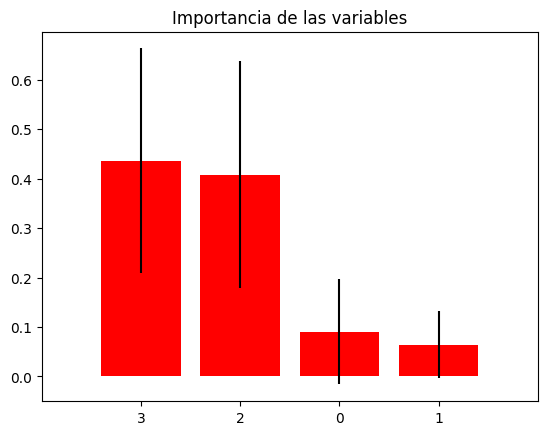

In [121]:

for f in range(X.shape[1]):
    print("%d. variable %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Grafico con las importancias de las variables
plt.figure()
plt.title("Importancia de las variables")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [122]:

#
# SONAR
#
sonar_filename = 'sonar_csv.csv'
sonar = pd.read_csv(sonar_filename, sep=',', decimal='.')


# X, y son las variables de entrada y de salida del dataset
X = sonar.iloc[:,:-1]
y = sonar.iloc[:,-1]


In [124]:

forest.fit(X, y)
importances = forest.feature_importances_
print("importancias:",importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Variables ordenadas por importancia
print("Variables ordenadas:")
for f in range(X.shape[1]):
    print("%d. variable %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


importancias: [0.01472082 0.01224943 0.0094484  0.01747739 0.01155439 0.01246314
 0.01015444 0.01502204 0.02695784 0.03085849 0.04275437 0.03993147
 0.02008296 0.01173135 0.01537397 0.01695023 0.01680394 0.01472078
 0.01139478 0.0230092  0.02681104 0.01519846 0.01540327 0.01283279
 0.01158387 0.01249206 0.0176917  0.02127883 0.01133377 0.01084055
 0.01600518 0.012138   0.01287487 0.01551146 0.0150956  0.02843782
 0.02317095 0.01190087 0.01292799 0.01149223 0.01087464 0.01606231
 0.01987872 0.0190872  0.02610777 0.02024026 0.02185479 0.02262641
 0.02786812 0.00864775 0.01802786 0.01562745 0.01059677 0.0133031
 0.01127408 0.00924569 0.00895131 0.00838745 0.01321272 0.00944485]
Variables ordenadas:
1. variable 10 (0.042754)
2. variable 11 (0.039931)
3. variable 9 (0.030858)
4. variable 35 (0.028438)
5. variable 48 (0.027868)
6. variable 8 (0.026958)
7. variable 20 (0.026811)
8. variable 44 (0.026108)
9. variable 36 (0.023171)
10. variable 19 (0.023009)
11. variable 47 (0.022626)
12. varia

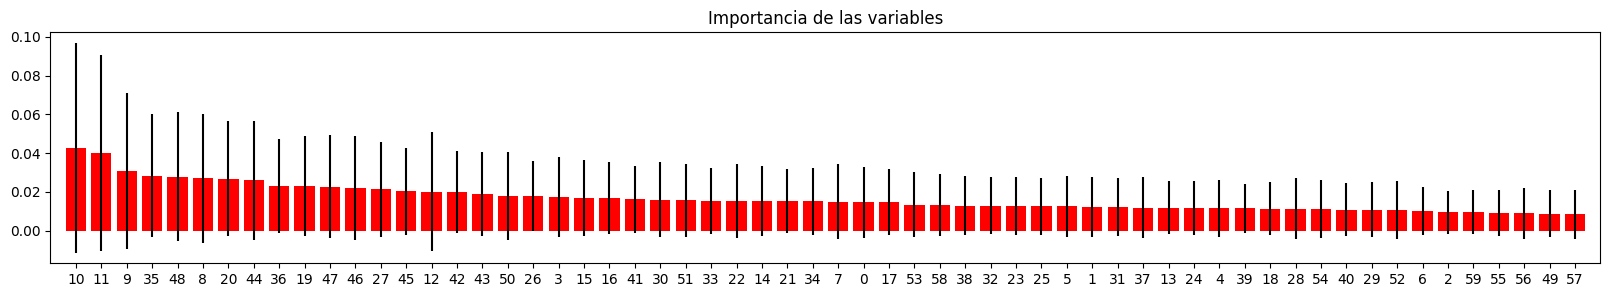

In [127]:
# Grafico con las importancias de las variables
plt.figure(figsize=(20,3))
plt.title("Importancia de las variables")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
